In [ ]:
!pip install indic-transliteration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.3/147.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
from indic_transliteration import sanscript
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate

# Example Malayalam text
text_malayalam = "മലയാളം ടെക്സ്റ്റ്"

# Transliterate Malayalam to Roman script
text_roman = transliterate(text_malayalam, sanscript.MALAYALAM, sanscript.ITRANS)

print(text_roman)


malayALaM TèksRR


In [ ]:
from transformers import pipeline

translator = pipeline("translation_ml_to_en", model="Helsinki-NLP/opus-mt-ml-en")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/818k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.72M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Typ


In [ ]:
print(translator("കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജന്യ കോക്ലിയാര്‍ ഇംപ്ലാന്റേഷന്‍ സര്‍ജറി പിണറായി സര്‍ക്കാര്‍ നിര്‍ത്തലാക്കി.")[0]['translation_text'])

For example, in the United States, the World Health Organization (now called the U.S.A.) stated: "It's not possible for parents to have children who are at risk of heart attack. "


In [ ]:
import pandas as pd

dataset_path = '/content/train_data_mal_fake_detect.csv'
df = pd.read_csv(dataset_path)

print(df.head())


          ID                                               News       Label
0  FAKE_1001  കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...  FALSE     
1  FAKE_1002  ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...  FALSE     
2  FAKE_1003  പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...  FALSE     
3  FAKE_1004  വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...  FALSE     
4  FAKE_1005  കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...  FALSE     


In [ ]:
accuracy=0.657

In [ ]:
!pip install sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
import pandas as pd
translator = pipeline("translation_ml_to_en", model="Helsinki-NLP/opus-mt-ml-en")


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/818k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.72M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'text' is the column with text to translate
# Replace NaN values with an empty string
df['News'] = df['News'].fillna('')

# Now, you can proceed with translation as these entries will be skipped or processed as empty strings.


In [ ]:
from transformers import pipeline
from tqdm.auto import tqdm

# Initialize the translation pipeline
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ml-en")

def translate_texts(texts):
    translations = []
    for text in tqdm(texts, desc="Translating"):
        # Skip translation if the text is an empty string
        if text.strip():  # Checks if text is not just whitespace
            translation = translator(text, max_length=512)[0]['translation_text']
            translations.append(translation)
        else:
            # Append an empty string or a placeholder for empty inputs
            translations.append('')
    return translations

# Apply translation to the cleaned 'text' column
df['translated_text'] = translate_texts(df['News'].tolist())

Translating:   0%|          | 0/1669 [00:00<?, ?it/s]

In [ ]:
# Specify the path where you want to save the translated dataset
translated_dataset_path = '/content/translated_dataset.csv'  # Adjust the path as needed

# Save the DataFrame to a CSV file
df.to_csv(translated_dataset_path, index=False)

print(f"Translated dataset saved to {translated_dataset_path}")


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

dataset_path = '/content/translated_dataset.csv'
df = pd.read_csv(dataset_path)

print(df.head())


          ID                                               News       Label  \
0  FAKE_1001  കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...  FALSE        
1  FAKE_1002  ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...  FALSE        
2  FAKE_1003  പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...  FALSE        
3  FAKE_1004  വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...  FALSE        
4  FAKE_1005  കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...  FALSE        

                                     translated_text  
0  For example, in the United States, the World H...  
1  The moon did not offer only a victory as chief...  
2  As a result, a number of scientists have been ...  
3  In time, however, it became evident that he wa...  
4           In front of the cross, it was a success.  


In [ ]:
df['Label'] = df['Label'].str.strip()

# Now, 'df['Label'].unique()' should give you the cleaned, unique values:
unique_labels = df['Label'].unique()
print(unique_labels)


['FALSE' 'HALF TRUE' 'MOSTLY FALSE' 'PARTLY FALSE' 'MOSTLY TRUE']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [ ]:
unique_labels = df['Label'].unique()
print(unique_labels)

[0 1 2 4 3]


In [ ]:

print(df.head())


          ID                                               News  Label  \
0  FAKE_1001  കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...      0   
1  FAKE_1002  ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...      0   
2  FAKE_1003  പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...      0   
3  FAKE_1004  വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...      0   
4  FAKE_1005  കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...      0   

                                     translated_text  
0  For example, in the United States, the World H...  
1  The moon did not offer only a victory as chief...  
2  As a result, a number of scientists have been ...  
3  In time, however, it became evident that he wa...  
4           In front of the cross, it was a success.  


In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(df['translated_text'], df['Label'], test_size=0.3)

In [ ]:
train_texts = train_texts.astype(str).tolist()
val_texts = val_texts.astype(str).tolist()

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512, return_tensors="tf")
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512, return_tensors="tf")


In [ ]:
import tensorflow as tf

# Convert the encodings and labels into a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

# Batch the datasets
train_dataset = train_dataset.shuffle(len(train_texts)).batch(8)
val_dataset = val_dataset.batch(8)


In [ ]:
from transformers import TFBertForSequenceClassification

# Load the BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Prepare the model for training
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train the model
model.fit(train_dataset, validation_data=val_dataset, epochs=3)

Epoch 1/3
146/146 [==============================] - 5916s 40s/step - loss: 0.8407 - accuracy: 0.7500 - val_loss: 0.8262 - val_accuracy: 0.7365
Epoch 2/3
146/146 [==============================] - 5879s 40s/step - loss: 0.8093 - accuracy: 0.7509 - val_loss: 0.8154 - val_accuracy: 0.7365
Epoch 3/3
146/146 [==============================] - 5834s 40s/step - loss: 0.8026 - accuracy: 0.7500 - val_loss: 0.8192 - val_accuracy: 0.7365


In [ ]:
model.save_pretrained('english_bert_save')
tokenizer.save_pretrained('english_bert_save')

In [ ]:
# Load the dataset
test_df = pd.read_csv('/content/FakeNews - Test Dataset2.csv')

In [ ]:
test_df['FactCheck'] = test_df['FactCheck'].fillna('').str.strip()

# Now, 'df['Label'].unique()' should give you the cleaned, unique values:
unique_labels = test_df['FactCheck'].unique()
print(unique_labels)

['False news' 'PARTLY False news' 'MOSTLY False news' 'HALF TRUE'
 'Mostly False news' 'Half true' 'Partly False news']


In [ ]:
# Define a mapping based on the provided labels
test_label_mapping = {
    'False news': 'FALSE',
    'PARTLY False news': 'PARTLY FALSE',
    'MOSTLY False news': 'MOSTLY FALSE',
    'HALF TRUE': 'HALF TRUE',
    'Mostly False news': 'MOSTLY FALSE',
    'Half true': 'HALF TRUE',
    'Partly False news': 'PARTLY FALSE'
}

# Apply this mapping to your test labels to harmonize them with the training labels
test_df['FactCheck'] = test_df['FactCheck'].map(test_label_mapping)


In [ ]:
label_mapping = {
    'FALSE': 0,
    'HALF TRUE': 1,
    'MOSTLY FALSE': 2,
    'PARTLY FALSE': 3,
    'MOSTLY TRUE': 4
}

In [ ]:
test_labels_encoded = test_df['FactCheck'].map(label_mapping).tolist()

In [ ]:
test_df['News'] = test_df['News'].fillna('').str.strip()

In [ ]:
from transformers import pipeline
from tqdm.auto import tqdm

In [ ]:
def translate_texts(texts):
    translations = []  # To store the translations
    for i, text in enumerate(tqdm(texts, desc="Translating")):
        try:
            # Skip translation if the text is empty or only whitespace
            if text.strip():
                translation = translator(text, max_length=512)[0]['translation_text']
                translations.append(translation)
            else:
                translations.append(text)  # Append the original text if it's empty/whitespace
        except Exception as e:
            print(f"Error at index {i}: {e}")
            translations.append(text)  # Append the original text in case of an error

            # Optional: save progress up to the point of error
            partial_df = pd.DataFrame({'FactCheck': texts[:i+1], 'Translated_FactCheck': translations})
            partial_df.to_csv('partial_translation_checkpoint.csv', index=False)
            print(f"Partial progress saved at index {i}.")

    return translations

# Translate the 'FactCheck' column
test_df['Translated_TestNews'] = translate_texts(test_df['News'].tolist())

Translating:   0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
test_texts = test_df['Translated_TestNews'].astype(str).tolist()

In [ ]:
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512, return_tensors="tf")


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels_encoded
))

test_dataset = test_dataset.batch(8)  # Use the same batch size as during training


In [ ]:
from numpy import argmax

# Make predictions
pred = model.predict(test_dataset)
pred_labels = argmax(pred.logits, axis=1)

32/32 [==============================] - 271s 8s/step


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(test_labels_encoded, pred_labels)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.657


In [ ]:
model_path = '/content/english'

model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/MyModel/tokenizer_config.json',
 '/content/MyModel/special_tokens_map.json',
 '/content/MyModel/vocab.txt',
 '/content/MyModel/added_tokens.json')

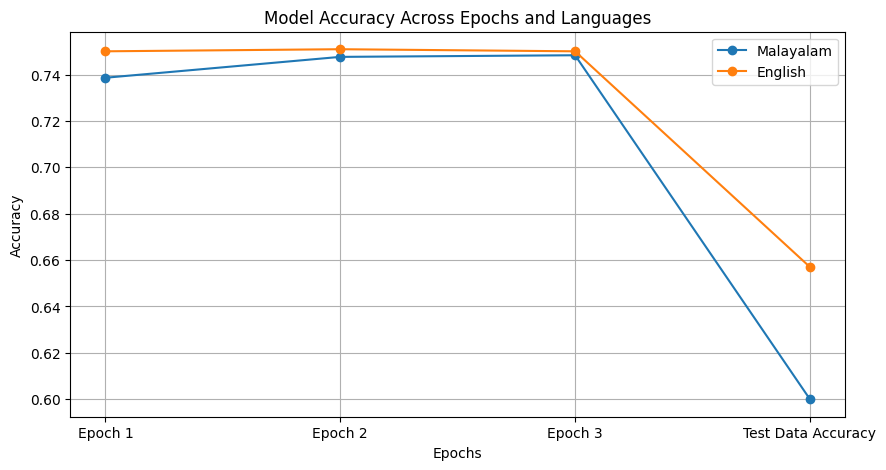

In [ ]:
import matplotlib.pyplot as plt

# Creating a DataFrame for the epoch data
epoch_data = {
    'Epoch': ['Epoch 1', 'Epoch 2', 'Epoch 3', 'Test Data Accuracy'],
    'Malayalam': [0.7386, 0.7476, 0.7483, 0.60],
    'English': [0.7500, 0.7509, 0.7500, 0.657]
}

epoch_df = pd.DataFrame(epoch_data)
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(epoch_df['Epoch'], epoch_df['Malayalam'], marker='o', label='Malayalam')
plt.plot(epoch_df['Epoch'], epoch_df['English'], marker='o', label='English')
plt.title('Model Accuracy Across Epochs and Languages')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
epoch_df

,Epoch,Malayalam,English
0,Epoch 1,0.7386,0.7500
1,Epoch 2,0.7476,0.7509
2,Epoch 3,0.7483,0.7500
3,Test Data Accuracy,0.6000,0.6570


from matplotlib import pyplot as plt
epoch_df['Malayalam'].plot(kind='hist', bins=20, title='Malayalam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
epoch_df['English'].plot(kind='hist', bins=20, title='English')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
epoch_df.groupby('Epoch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
epoch_df.plot(kind='scatter', x='Malayalam', y='English', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
epoch_df['Malayalam'].plot(kind='line', figsize=(8, 4), title='Malayalam')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
epoch_df['English'].plot(kind='line', figsize=(8, 4), title='English')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(epoch_df['Epoch'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(epoch_df, x='Malayalam', y='Epoch', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(epoch_df['Epoch'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(epoch_df, x='English', y='Epoch', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)